[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/TobGerken/ISAT300/blob/main/6_CalibrationAndADConversion.ipynb)

# Instrument Calibration & Analogue to Digital Conversion 

**This notebook is published on my github. It is publicly accessible, but you cannot save your changes to my github. Learning git & github is beyond the scope of this course. If you are familiar with github, you know that to do. If you don't know github, you can save a personal copy of the file to your google drive, so that you can save your changes and can access them at a later date**

This notebook is a continuation from previous classes:

1. [GettingStarted](https://github.com/TobGerken/ISAT300/blob/main/1_GettingStarted.ipynb)
2. [Data Visualization](https://github.com/TobGerken/ISAT300/blob/main/2_DataVisualization.ipynb)
3. [Heart Rate Lab Review](https://github.com/TobGerken/ISAT300/blob/main/3_HeartRateLabReview.ipynb)
4. [Temperature Response Lab Review](https://github.com/TobGerken/ISAT300/blob/main/4_TemperatureResponseLabReview.ipynb)
5. [Standard Error](https://github.com/TobGerken/ISAT300/blob/main/5_StandardErrorDemonstration.ipynb)

This notebook accompanies the powerpoint presentation posted to Canvas. 

During all of the experiments we have seen that instruments need calibration and we have learned to apply calibration curves that convert the sensor output (for example a voltage) into information about the underlying measurand (for example temperature). 

**During the Labs we have also worked using the Raspberry Pi and have specifically used a digital interface.** You may recall that the output from the thermocouple was analog (i.e. continuous) while the PI and the output on your screen was a digital signal (i.e. discret or step-wise, even though it may not seem that way). This has to do with the fact [how computers store numbers](https://theyear2038problem.com/learn-how-computers-store-integer-numbers/). 

![Analog vs Digital](https://cdn1.byjus.com/wp-content/uploads/2022/05/Difference-Between-Analog-And-Digital-Signal.png)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')


## An analog signal

Let's assume that we have a thermocouple that produces a voltage output between -5 and +5 V depending on the environmental temperature. 

You measure -5V at -40 $^o$C and +5V at 460 $^o$C.

Text(0.5, 1.0, 'Relationship between Measurand and Sensor Output Signal')

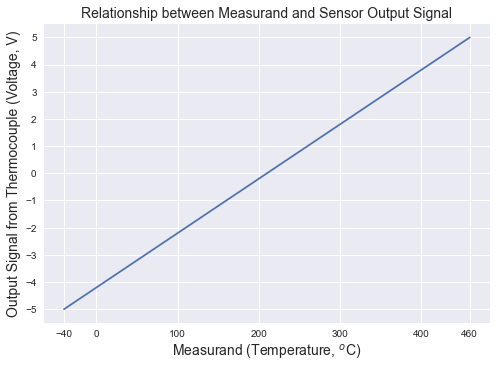

In [13]:
# np.random.normal(mean,standardDeviation)
T = np.linspace(-40, 460,1000)
V = np.linspace(-5,+5,1000)

plt.plot(T,V)
plt.ylabel('Output Signal from Thermocouple (Voltage, V)', fontsize = 14)
plt.xlabel('Measurand (Temperature, $^o$C)', fontsize = 14)
plt.xticks([-40, 0, 100, 200, 300, 400, 460])
plt.yticks(np.linspace(-5,5,11))
plt.title('Relationship between Measurand and Sensor Output Signal', fontsize = 14)

This looks like a continous signal, and we could apply a calibration to our output signal in volts to display temperature for every measured voltage from the thermocouple. 

To do so we need to know the slope and offset of the relationship between **Measurand** and **Output Signal**.

Let's determine these. We could do this by just looking at it, but we can also use numpy. 

Try this out and use the `np.polyfit()` function to estimate slope and offset. 

In [28]:
slope, offset  = np.polyfit(T,V,1) # We can fit a first oder polynom (a straigt line) using np.polyfit(x,y,1)
print(f'V = %3.2f T + %3.2f Volts' %(slope , offset))

V = 0.02 T + -4.20 Volts


If you were now given a voltage, how would you translate this back into a temperature? 

Let's say you measure -1.7, +3.2, and 0.34 Volts. 

[125. 370. 227.]


Text(0.5, 1.0, 'Relationship between Measurand and Sensor Output Signal')

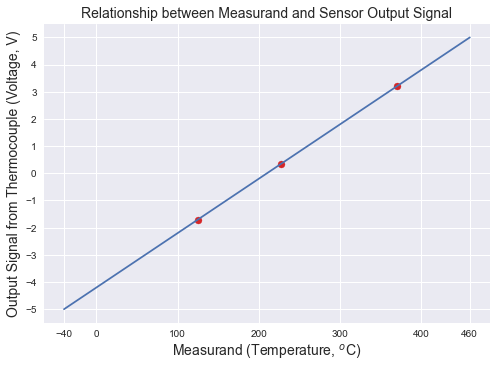

In [33]:
V_observed = [-1.7, 3.2, 0.34]

# complete the expression that converts V into T using slope and offset:
T_observed = V_observed 

# Your solution for the calibrated temperature should end up on the line 
print(T_observed)
plt.plot(T,V)
plt.scatter(T_observed, V_observed, color = 'tab:red')
plt.ylabel('Output Signal from Thermocouple (Voltage, V)', fontsize = 14)
plt.xlabel('Measurand (Temperature, $^o$C)', fontsize = 14)
plt.xticks([-40, 0, 100, 200, 300, 400, 460])
plt.yticks(np.linspace(-5,5,11))
plt.title('Relationship between Measurand and Sensor Output Signal', fontsize = 14)


## Digital Signal

All digital devices need to store data and as it turns out, data storage is not contunious, because computers can only store data in binary format. A switch is either ON or OFF with nothing inbetween. Each change between ON and OFF is one bit. 

The more bits are used to store data the higher precision you can have (see lecture). 

**Let's pretend for a moment that computers were not binary, but that they would work on the decimal system.** 

Our decimal computer can store numbers between 0 and 100 only. It cannot store numbers that are bigger or smaller than that. Separate from that it can store the sign of the number. 

1. We can store the lowest possible output from the thermocouple (=-5 volts)
2. We can also store the span (-5 to +5 V = 10 volts span) of the thermocouple outputs. 

This means effectively, we get the following: 

Text(0.5, 1.0, 'Zoomed in')

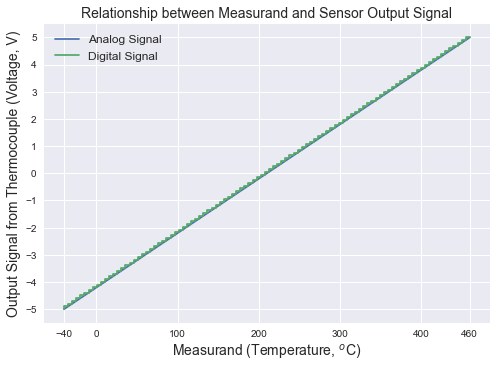

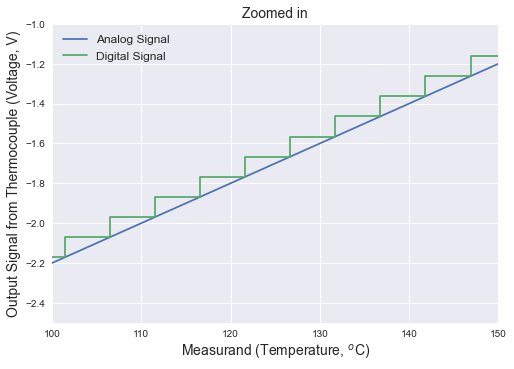

In [47]:
T = np.linspace(-40, 460,1000)
V_Analog = np.linspace(-5,+5,1000)
T_Digital = np.linspace(-40, 460,100)
V_Digital = np.linspace(-5,+5,100)

plt.subplots()
plt.plot(T,V_Analog)
plt.step(T_Digital,V_Digital)
plt.ylabel('Output Signal from Thermocouple (Voltage, V)', fontsize = 14)
plt.xlabel('Measurand (Temperature, $^o$C)', fontsize = 14)
plt.xticks([-40, 0, 100, 200, 300, 400, 460])
plt.yticks(np.linspace(-5,5,11))
plt.legend(['Analog Signal', 'Digital Signal'], fontsize = 12)
plt.title('Relationship between Measurand and Sensor Output Signal', fontsize = 14)

# this is a zoomed in version of the same plot
plt.subplots()
plt.plot(T,V_Analog)
plt.step(T_Digital,V_Digital)
plt.ylabel('Output Signal from Thermocouple (Voltage, V)', fontsize = 14)
plt.xlabel('Measurand (Temperature, $^o$C)', fontsize = 14)
plt.xlim((100, 150))
plt.ylim((-2.5, -1))
plt.legend(['Analog Signal', 'Digital Signal'], fontsize = 12)
plt.title('Zoomed in', fontsize = 14)


As long as we don't zoom in, this looks OK. The thermocouple produces a step output, but it looks very similar to the analog signal. **However if we zoom in, we see that each step actually corresponds to a temperature change of 5$^o$C.** Simply because our temperature measurement is discrete. 

Our sensor resolution is the temperature span divided by the total number of values availble to store data. 

$Resolution = \frac{\text{Span}}{\text{# of values}}$

In a binary system (like all computers are) the largest number of different values is given in powers of two.  

The smallest possible number is $0$ and the biggest possible number is given by: $2^n\,-1$, where $n$ is the number of bits.

Let's try this out. 

**What is the largest number you could store using `8 bits` or `16 bits`?**

In [74]:
# We can actually explicitly tell our computer to use different numbers of bits for storage and test this out. 
# Change the number to something else and see what happens as numbers get bigger? 

# What will happen if we use numbers that are too big?

#For example 8 or 16 bits. 
number = 0
_8bit  = np.uint8(number)
_16bit = np.uint16(number)
print('8 bit example:', _8bit)
print('16 bit example:', _16bit)


8 bit example: 0
16 bit example: 0


You might have noticed that using `16 bits` of storage means that we can store much larger numbers compared to `8 bits` and that therefore our resolution becomes much finer. 

**What would our resolution for voltage and temperature be if our system would use `8 bits` and `16 bits`?**

Let's calculate the resolution to find out. 

$Resolution = \frac{\text{Span}}{\text{# of values}} =  \frac{\text{Span}}{2^n - 1}$


In [85]:
SpanV = # Find the span for voltage
SpanT = # Find the span for voltage

n8  = 8  # 8 bits
n16 = 16 # 16 bits
V_Resolution_8bit  = SpanV / (2**n8-1)
V_Resolution_16bit = SpanV / (2**n16-1)

T_Resolution_8bit  = SpanT / (2**n8-1)
T_Resolution_16bit = SpanT / (2**n16-1)

print('The resolution for voltage is', V_Resolution_8bit, V_Resolution_16bit, 'volts for', n8, n16, 'bits')
print('The resolution for temperature is', T_Resolution_8bit, T_Resolution_16bit, ' degrees for', n8, n16, 'bits')


SyntaxError: invalid syntax (<ipython-input-85-7fbd33b090f6>, line 1)

Based on the above example a system using `8 bit` could only be used to detect temperature with a resolution of about 2 degrees, while a `16 bit` system would be able to measure temparature change of less than 0.1 degrees Celsius. 

This means that for a thermocouple with the range of 500$^o$C, which is a fairly typical range for a thermocouple the effect of the analog to digital conversion really matters, especially if we measure temperatures that are in a much more narrow range (for example near room temperature. 

(0.0, 50.0)

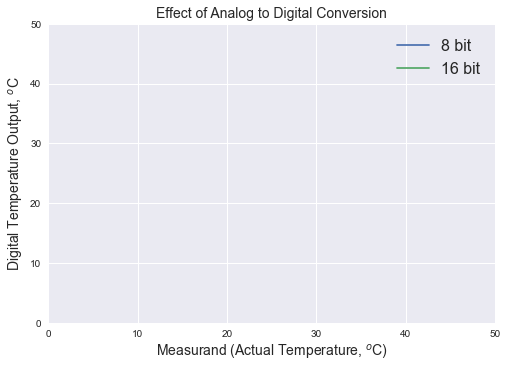

In [110]:
def roundPartial (value, resolution):
    return np.round (value / resolution) * resolution


T = np.linspace(0,50,1000)

T_8bit = roundPartial(T, T_Resolution_8bit)
T_16bit = roundPartial(T, T_Resolution_16bit)

plt.subplots()
plt.plot(T,T_8bit)
plt.step(T,T_16bit)
plt.legend(['8 bit', '16 bit'],fontsize =16)
plt.ylabel('Digital Temperature Output, $^o$C', fontsize = 14)
plt.xlabel('Measurand (Actual Temperature, $^o$C)', fontsize = 14)
plt.title('Effect of Analog to Digital Conversion', fontsize = 14)
plt.xlim((0, 50))
plt.ylim((0, 50))

## Aliasing 

Aliasing is a common problem. Some of you may have heard the term in connection with PC Graphics. [Aliasing](https://en.wikipedia.org/wiki/Aliasing) is an effect created by insufficient sampling in space of time. In graphics, it can cause visual artifacts like the one seen below.

![Example of Aliasing taken from wikipedia](https://github.com/TobGerken/ISAT300/blob/main/Figures/AliasingExample.PNG?raw=true)

**In eperiments bad choice of sampling times will lead to wrong conclusions.**


Consider that you are conducting an experiment and your are collecting the measurement below. 


Text(0.5, 0, 'Time (seconds)')

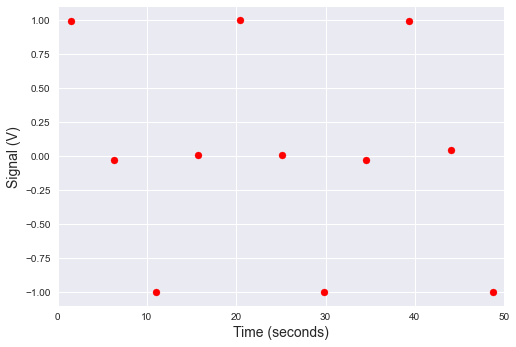

In [139]:
x = np.linspace(1,60,2000)
y = np.sin(x)

#plt.plot(x,y)
plt.scatter(x[18::160],y[18::160], marker = 'o', color = 'r') 
plt.xlim(0,50)
plt.ylabel('Output Signal (V)', fontsize = 14)
plt.xlabel('Time (seconds)', fontsize = 14)
plt.titel('Aliasing Example', fontsize = 14)

The output signal from your sensor is showing an oscillation.  

**Based on the measurements below, how what is the period (the time it takes for the signal to repeat) of the oscillation?**

Text(0.5, 1.0, 'Aliasing Example')

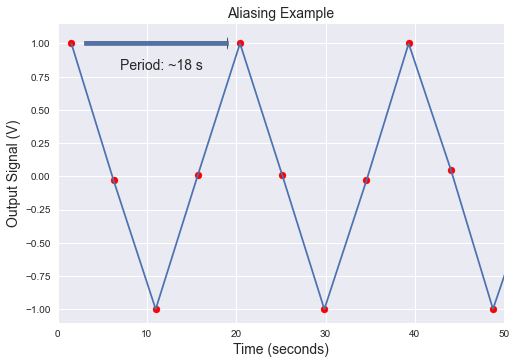

In [158]:
# Execute the code below 
plt.scatter(x[18::160],y[18::160], marker = 'o', color = 'r') 
plt.plot(x[18::160],y[18::160]) 

plt.xlim(0,50)
ax = plt.ylabel('Output Signal (V)', fontsize = 14)
plt.xlabel('Time (seconds)', fontsize = 14)
plt.arrow(3,1, 16, 0, width=.03)
plt.text(7,0.8, 'Period: ~18 s', fontsize = 14)
plt.title('Aliasing Example', fontsize = 14)

# Uncomment the line below and see what happens 
#plt.plot(x,y,linestyle =':', color='tab:orange') 

The above is an example of temporal aliasing.

**What does this mean and why are we seeing this effect?**